# Solution of Exam (F24), May 2024

*by Jakob Lemvig and Steeven Hegelund Spangsdorf*

In [1]:
from sympy import *
init_printing()
from dtumathtools import *

## Exercise 1

Given quadratic form:

In [2]:
x1,x2,x3 = symbols("x_1 x_2 x_3")
xvec = Matrix([x1, x2, x3])
q = 5*x1**2 + 8*x1*x2 - 4*x1*x3 - 22*x1 + 5*x2**2 + 4*x2*x3 - 32*x2 + 8*x3**2 - 20*x3 + 53
q

### a

The partial derivatives are:

In [3]:
qx1=diff(q,x1)
qx2=diff(q,x2)
qx3=diff(q,x3)

hence, the gradient is:

In [4]:
nabla_q = Matrix([qx1,qx2,qx3])
nabla_q

⎡10⋅x₁ + 8⋅x₂ - 4⋅x₃ - 22 ⎤
⎢                         ⎥
⎢8⋅x₁ + 10⋅x₂ + 4⋅x₃ - 32 ⎥
⎢                         ⎥
⎣-4⋅x₁ + 4⋅x₂ + 16⋅x₃ - 20⎦

for any $\pmb{x}=(x_1,x_2,x_3) \in \mathbb{R}^3$. The gradient can also be found by:

In [5]:
nabla_q = dtutools.gradient(q,[x1,x2,x3])
nabla_q

⎡10⋅x₁ + 8⋅x₂ - 4⋅x₃ - 22 ⎤
⎢                         ⎥
⎢8⋅x₁ + 10⋅x₂ + 4⋅x₃ - 32 ⎥
⎢                         ⎥
⎣-4⋅x₁ + 4⋅x₂ + 16⋅x₃ - 20⎦

### b

The Hessian matrix is computed by:

In [6]:
H_q = hessian(q, [x1,x2,x3])   # or dtutools.hessian(q, [x1,x2,x3])
H_q

⎡10  8   -4⎤
⎢          ⎥
⎢8   10  4 ⎥
⎢          ⎥
⎣-4  4   16⎦

This completes the answer to question b. Using the Hessian matrix, it is easy to write the quadratic form in matrix form as:

In [7]:
A = S(1)/2 * H_q
b = Matrix([-22, -32, -20])
c = 53
A, b, c

⎛⎡5   4  -2⎤  ⎡-22⎤    ⎞
⎜⎢         ⎥  ⎢   ⎥    ⎟
⎜⎢4   5  2 ⎥, ⎢-32⎥, 53⎟
⎜⎢         ⎥  ⎢   ⎥    ⎟
⎝⎣-2  2  8 ⎦  ⎣-20⎦    ⎠

In [8]:
q_check = xvec.T * A * xvec + b.T * xvec + Matrix([c])
q_check[0].simplify()

Indeed, the matrix form of $q$ based on the Hessian matrix agrees with the given $q$:

In [9]:
q_check[0].simplify() == q.simplify()

True

### c

The Hessian is a real, symmetric matrix so we know according to the spectral theorem that there exists an orthonormal basis of eigenvectors. We find the eigenvalues and eigenvectors by:

In [10]:
eig = H_q.eigenvects()
eig

⎡⎛      ⎡⎡2 ⎤⎤⎞  ⎛       ⎡⎡1⎤  ⎡-1/2⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢ ⎥  ⎢    ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢-2⎥⎥⎟, ⎜18, 2, ⎢⎢1⎥, ⎢ 0  ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢ ⎥  ⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝       ⎣⎣0⎦  ⎣ 1  ⎦⎦⎠⎦

The eigenvectors associated with different eigenvalues are orthogonal to each other since the matrix is real symmetric. However, since the algebraic multiplicity of the eigenvalue $18$ is two, we need to make sure that the two associated linearly independent eigenvectors are orthogonal. We use the Gram-Schmidt procedure to obtain two orthonormal eigenvectors:

In [11]:
GramSchmidt(eig[1][2], True)

⎡      ⎡-√2 ⎤⎤
⎢⎡√2⎤  ⎢────⎥⎥
⎢⎢──⎥  ⎢ 6  ⎥⎥
⎢⎢2 ⎥  ⎢    ⎥⎥
⎢⎢  ⎥  ⎢ √2 ⎥⎥
⎢⎢√2⎥, ⎢ ── ⎥⎥
⎢⎢──⎥  ⎢ 6  ⎥⎥
⎢⎢2 ⎥  ⎢    ⎥⎥
⎢⎢  ⎥  ⎢2⋅√2⎥⎥
⎢⎣0 ⎦  ⎢────⎥⎥
⎣      ⎣ 3  ⎦⎦

The eigenvector associated with $0$ only needs to be normalized. There are several ways to do this, e.g.,

In [12]:
GramSchmidt(eig[0][2], True)

⎡⎡2/3 ⎤⎤
⎢⎢    ⎥⎥
⎢⎢-2/3⎥⎥
⎢⎢    ⎥⎥
⎣⎣1/3 ⎦⎦

or,

In [13]:
Matrix(eig[0][2]).normalized()

⎡2/3 ⎤
⎢    ⎥
⎢-2/3⎥
⎢    ⎥
⎣1/3 ⎦

Finally, we combine the three orthonormal eigenvectors in a basis denoted $\beta$:

In [14]:
beta = GramSchmidt(eig[0][2], True)[0], GramSchmidt(eig[1][2], True)[0], GramSchmidt(eig[1][2], True)[1] 
beta

⎛              ⎡-√2 ⎤⎞
⎜        ⎡√2⎤  ⎢────⎥⎟
⎜        ⎢──⎥  ⎢ 6  ⎥⎟
⎜⎡2/3 ⎤  ⎢2 ⎥  ⎢    ⎥⎟
⎜⎢    ⎥  ⎢  ⎥  ⎢ √2 ⎥⎟
⎜⎢-2/3⎥, ⎢√2⎥, ⎢ ── ⎥⎟
⎜⎢    ⎥  ⎢──⎥  ⎢ 6  ⎥⎟
⎜⎣1/3 ⎦  ⎢2 ⎥  ⎢    ⎥⎟
⎜        ⎢  ⎥  ⎢2⋅√2⎥⎟
⎜        ⎣0 ⎦  ⎢────⎥⎟
⎝              ⎣ 3  ⎦⎠

The assoicated change-of-basis matrix $Q$ is:

In [15]:
Q = Matrix([beta])
Q 

⎡      √2  -√2 ⎤
⎢2/3   ──  ────⎥
⎢      2    6  ⎥
⎢              ⎥
⎢      √2   √2 ⎥
⎢-2/3  ──   ── ⎥
⎢      2    6  ⎥
⎢              ⎥
⎢          2⋅√2⎥
⎢1/3   0   ────⎥
⎣           3  ⎦

Let's check that $Q$ is indeed an orthogonal matrix:

In [16]:
Q * Q.T

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Note that $Q$ is not unique (not even up to multiplication by $-1$) as there are infinitely many ways to obtain an orthonormal basis for the eigenspace associated with $18$. Here is another change-of-basis matrix:

In [17]:
V = Matrix([[S(1)/3, S(-2)/3, S(2)/3], [S(2)/3, S(-1)/3, S(-2)/3], [S(2)/3, S(2)/3, S(1)/3]])
V * V.T, H_q * V, V

⎛⎡1  0  0⎤  ⎡6   -12  0⎤  ⎡1/3  -2/3  2/3 ⎤⎞
⎜⎢       ⎥  ⎢          ⎥  ⎢               ⎥⎟
⎜⎢0  1  0⎥, ⎢12  -6   0⎥, ⎢2/3  -1/3  -2/3⎥⎟
⎜⎢       ⎥  ⎢          ⎥  ⎢               ⎥⎟
⎝⎣0  0  1⎦  ⎣12  12   0⎦  ⎣2/3  2/3   1/3 ⎦⎠

### d

We insert $\pmb{x} = (1,2,1)$ in the expresseion of $\nabla q$ which yields:

In [18]:
nabla_q.subs({x1:1,x2:2,x3:1})

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Since the gradient at the given point is the zero vector, then $\pmb{x} = (1,2,1)$ is a stationary point. To find all stationary points, we find all solutions to the equation system $\nabla q(\pmb{x}) = (0,0,0)$:

In [19]:
solve(list(nabla_q),[x1,x2,x3])

Setting $x_3 = t$, $t \in \mathbb{R}$, we see that all stationary points are given by:

\begin{equation*}
(x_1,x_2,x_3) = (2t-1, -2t+4, t) = (2,-2,1) t + (-1,4,0)
\end{equation*}

where $t \in \mathbb{R}$.

### e

Since the function $q$ is a quadratic form, the line found in question d above is a line along which there is no increase nor decrease of $q$. In fact, this line is $(1,2,1) + \mathrm{span}(v_1)$ where $v_1$ is an eigenvector of $0$. So, the function $q$ is constant in the direction of $v_1$. *Remark:* The Hessian is not really useful here since:

In [20]:
H_q.eigenvals()

### f

Given $x_0$, and restating the gradient:

In [21]:
x0 = Matrix([1, 2, 1]) + 3 * V[:, 1]
nabla_q, x0

⎛⎡10⋅x₁ + 8⋅x₂ - 4⋅x₃ - 22 ⎤  ⎡-1⎤⎞
⎜⎢                         ⎥  ⎢  ⎥⎟
⎜⎢8⋅x₁ + 10⋅x₂ + 4⋅x₃ - 32 ⎥, ⎢1 ⎥⎟
⎜⎢                         ⎥  ⎢  ⎥⎟
⎝⎣-4⋅x₁ + 4⋅x₂ + 16⋅x₃ - 20⎦  ⎣3 ⎦⎠

We carry out the gradient method to compute $x_{10}$, where $x_{n+1}=x_n-\alpha\nabla q(x_n)$ for $n=0,1,2,\ldots$:

In [22]:
alpha = 0.02
x = x0
for n in range(1,11):
    x = x - alpha * nabla_q.subs({x1: x[0], x2: x[1], x3: x[2]})
x

⎡0.976941569907863⎤
⎢                 ⎥
⎢1.98847078495393 ⎥
⎢                 ⎥
⎣1.02305843009214 ⎦

The gradient method converges towards $(1,2,1)$ since `3 * V[:,1]` belongs to the orthogonal complement of the null-space of $A$. The gradient method progresses along this direction and intersects the "stationary line" at the point $(1,2,1)$.

## Exercise 2

Given quadratic form:

In [23]:
x1, x2, x3, x4 = symbols("x_1 x_2 x_3 x_4")
q = 2 * x1 * x3 + 4 * x2 * x4
q

### a

The Hessian matrix is given by:

In [24]:
H = hessian(q, [x1, x2, x3, x4])
H

⎡0  0  2  0⎤
⎢          ⎥
⎢0  0  0  4⎥
⎢          ⎥
⎢2  0  0  0⎥
⎢          ⎥
⎣0  4  0  0⎦

We note that the Hessian matrix is symmetric. A symmetric matrix $A$ that fulfills $q=\pmb{x}^TA\pmb{x}$, where $\pmb{x}=[x_1,x_2,x_3,x_4]^T$ is thus:

In [25]:
A = S(1)/2 * H
A

⎡0  0  1  0⎤
⎢          ⎥
⎢0  0  0  2⎥
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎣0  2  0  0⎦

### b

An orthogonal matrix $Q$ that reduces the quadratic form is found as the change-of-basis matrix that diagonalizing $A$:

In [26]:
Q, Lamda = A.diagonalize(normalize=True)
Q, Lamda

⎛⎡      -√2   √2    ⎤                ⎞
⎜⎢ 0    ────  ──  0 ⎥                ⎟
⎜⎢       2    2     ⎥                ⎟
⎜⎢                  ⎥                ⎟
⎜⎢-√2             √2⎥  ⎡-2  0   0  0⎤⎟
⎜⎢────   0    0   ──⎥  ⎢            ⎥⎟
⎜⎢ 2              2 ⎥  ⎢0   -1  0  0⎥⎟
⎜⎢                  ⎥, ⎢            ⎥⎟
⎜⎢       √2   √2    ⎥  ⎢0   0   1  0⎥⎟
⎜⎢ 0     ──   ──  0 ⎥  ⎢            ⎥⎟
⎜⎢       2    2     ⎥  ⎣0   0   0  2⎦⎟
⎜⎢                  ⎥                ⎟
⎜⎢ √2             √2⎥                ⎟
⎜⎢ ──    0    0   ──⎥                ⎟
⎝⎣ 2              2 ⎦                ⎠

Denote the $i$th column vector of $Q$ by $\pmb{q}_i$, and let $\beta = \pmb{q}_1, \pmb{q}_2, \pmb{q}_3, \pmb{q}_4$.    
Defining new coordinates as $\pmb{k}=[k_1,k_2,k_3,k_4]^T$, where $\pmb{k} = Q^T \pmb{x}$, we have $q$ expressed in the reduced form:

In [27]:
k1, k2, k3, k4 = symbols("k_1,k_2,k_3,k_4")
kvec = Matrix([k1, k2, k3, k4])
q_new = Matrix([kvec.T * Lamda * kvec])[0]
q_new

### c

We now consider $q$ restricted to the set:

\begin{equation*}
B=\{ \pmb{x}\in \mathbb{R}^4 \mid x_1^2+x_2^2+x_3^2+x_4^2\leq 1 \}.
\end{equation*}

Since $q: B \to \mathbb{R}$ is continuous on a bounded and closed domain, it has a global minimum and maximum value by Theorem 5.2.1.

### d

Extrema of $q$ over the domain $B$ are to be found in the stationary points in the interior of $B$, at the boundary of $B$, or at exceptional points (see Theorem 5.2.2). Since the function is smooth, there are no exceptional points. Hence, we must investigate the interior and the boundary. First, the interior:

The partial derivatives are given by:

In [28]:
qx1 = diff(q, x1)
qx2 = diff(q, x2)
qx3 = diff(q, x3)
qx4 = diff(q, x4)
qx1, qx2, qx3, qx4

Thus, the gradient is:

In [29]:
nabla_q = Matrix([qx1, qx2, qx3, qx4])
nabla_q

⎡2⋅x₃⎤
⎢    ⎥
⎢4⋅x₄⎥
⎢    ⎥
⎢2⋅x₁⎥
⎢    ⎥
⎣4⋅x₂⎦

Alternatively, it can be found by:

In [30]:
nabla_q = dtutools.gradient(q, [x1, x2, x3, x4])
nabla_q

⎡2⋅x₃⎤
⎢    ⎥
⎢4⋅x₄⎥
⎢    ⎥
⎢2⋅x₁⎥
⎢    ⎥
⎣4⋅x₂⎦

Hence, obviuosly, the gradient equals the zero vector if and only if $\pmb{x}=0$. We can check this in Python by:

In [31]:
solve(list(nabla_q), [x1, x2, x3, x4])

So, there exists only one stationary point in the interior of $q$ on $B$, and it is found at $(0,0,0,0)$. The corresponding function value is:

In [32]:
q.subs({x1: 0, x2: 0, x3: 0, x4: 0})

Now, investigating boundary points. We see from the given set that the boundary of $B$ is a unit sphere centred at the origin with a radius of 1, so all points that fulfill $x_1^2+x_2^2+x_3^2+x_4^2=1$:

\begin{equation*}
\partial B=\{ \pmb{x}\in \mathbb{R}^4 \mid \Vert \pmb{x} \Vert = 1 \}.
\end{equation*}

We note that this unit sphere $\partial B$ is invariant under $Q^T$ (and $Q$) since $Q^T$ is orthogonal and therefore satisfies $\Vert Q^T \pmb{x}\Vert = \Vert\pmb{x} \Vert$ for all $\pmb{x}$ (see Theorem 2.6.1(vi)). Alternatively, you may argue using that $Q^T$ only causes rotation and reflection of the coordinate system and does not alter distances. Hence, we may use the easier new coordinates, which we above denoted by $\pmb{k}$, and the unit sphere is thus described by $\Vert \pmb{k} \Vert = k_1^2+k_2^2+k_3^2+k_4^2=1$.

Recall that $q$ in the new coordinates was:

In [33]:
q_new

Note that $k_1,k_2,k_3,k_4$ are squared in this expression, so $k_1,k_2$ have negative contributions, while $k_3,k_4$ have positive contributions. Maximum of $q$ on the sphere is thus found, firstly where $k_1=0,k_2=0$, and secondly where $k_4^2$ is largest due to its larger factor, meaning that $k_4=\pm 1$ while $k_3=0$. Maximum on the boundary is thus found at $\pmb{k}=[0,0,0,1]^T$ and at $\pmb{k}=[0,0,0,-1]^T$ with a function value of:

In [34]:
q_new.subs({k1: 0, k2: 0, k3: 0, k4: 1})

Equivalently, a minimum is found where $k_3,k_4$ are zero and $k_1^2$ is largest, so $k_1=\pm 1$, thus requiring $k_2=0$. Minimum on the boundary is thus found at $(1,0,0,0)$ and at $(-1,0,0,0)$ with a function value of:

In [35]:
q_new.subs({k1: 1, k2: 0, k3: 0, k4: 0})

The stationary point is seen to not be an extremum. Global extrema of $q$ on $B$ are hence on the boundary as found above. We are not asked to find the location of the extremas, but they are easily found in the standard basis using $Q$

In [36]:
Q * kvec.subs({k1: 0, k2: 0, k3: 0, k4: 1}), Q * kvec.subs({k1: 0, k2: 0, k3: 0, k4: -1})

⎛⎡0 ⎤  ⎡ 0  ⎤⎞
⎜⎢  ⎥  ⎢    ⎥⎟
⎜⎢√2⎥  ⎢-√2 ⎥⎟
⎜⎢──⎥  ⎢────⎥⎟
⎜⎢2 ⎥  ⎢ 2  ⎥⎟
⎜⎢  ⎥, ⎢    ⎥⎟
⎜⎢0 ⎥  ⎢ 0  ⎥⎟
⎜⎢  ⎥  ⎢    ⎥⎟
⎜⎢√2⎥  ⎢-√2 ⎥⎟
⎜⎢──⎥  ⎢────⎥⎟
⎝⎣2 ⎦  ⎣ 2  ⎦⎠

In [37]:
Q * kvec.subs({k1: 1, k2: 0, k3: 0, k4: 0}), Q * kvec.subs({k1: -1, k2: 0, k3: 0, k4: 0})

⎛⎡ 0  ⎤  ⎡ 0  ⎤⎞
⎜⎢    ⎥  ⎢    ⎥⎟
⎜⎢-√2 ⎥  ⎢ √2 ⎥⎟
⎜⎢────⎥  ⎢ ── ⎥⎟
⎜⎢ 2  ⎥  ⎢ 2  ⎥⎟
⎜⎢    ⎥, ⎢    ⎥⎟
⎜⎢ 0  ⎥  ⎢ 0  ⎥⎟
⎜⎢    ⎥  ⎢    ⎥⎟
⎜⎢ √2 ⎥  ⎢-√2 ⎥⎟
⎜⎢ ── ⎥  ⎢────⎥⎟
⎝⎣ 2  ⎦  ⎣ 2  ⎦⎠

which is the locations of the two maxima and the two minima,  respectively.

## Exercise 3

Given function $f:\mathbb R^2\to\mathbb R$ which for $(x,y)=(0,0)$ is $f(0,0)=0$, and for $(x,y)\in\mathbb R^2\setminus(0,0)$ is:

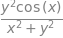

In [38]:
x,y = symbols("x y", real=True)
f = y**2 * cos(x) / (x**2 + y**2)
f

### a

Plot for $(x,y)\in\mathbb R^2\setminus(0,0)$:

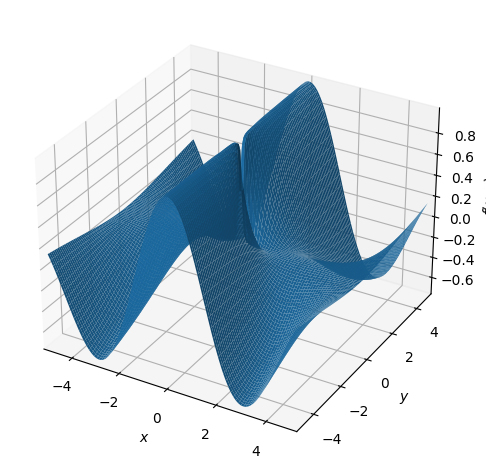

In [39]:
dtuplot.plot3d(f, (x, -5, 5), (y, -5, 5))

### b

First-order partial derivatives for $(x,y)\in\mathbb R^2\setminus(0,0)$ are found to be:

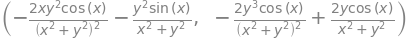

In [40]:
f.diff(x), f.diff(y)

### c

2nd-degree Taylor polynomial $P_2$ of $\cos(x)$ expanded from $x_0=0$:

In [41]:
series(cos(x), x, 0, 3).removeO()

### d

Note first that $f(x,x)$ is just a special case of $f(x,y)$ where $x=y$. The limit value is then easily computed:

\begin{equation*}
\lim_{x\to 0}f(x,x)=\lim_{x\to 0}\frac{x^2\cos(x)}{x^2+x^2}=\lim_{x\to 0}\frac{\cos(x)}{2}= \frac12
\end{equation*}

Check:

In [42]:
f.subs(y,x).limit(x,0)

or (using Taylor's limit formula):

In [43]:
(y**2 * series(cos(x), x, 0, 3).removeO() / (x**2 + y**2)).subs(y,x)

### e

The limit value:

\begin{equation*}
\lim_{x\to 0}f(x,2x)=\lim_{x\to 0}\frac{(2x)^2\cos(x)}{x^2+(2x)^2}=\lim_{x\to 0}\frac{4x^2\cos(x)}{x^2+4x^2}=\lim_{x\to 0}\frac{4\cos(x)}{5}=\frac45
\end{equation*}

Check:

In [44]:
f.subs(y,2*x).limit(x,0)

### f

The first-order partial derivatives are continuously differentiable on $\mathbb{R}^2 \setminus \{(0,0)\}$ so $f$ is differentiable on this domain. Since $f$ is not continuous at $(0,0)$, it is not differentiable here.

## Exercise 4

Given vector field $\pmb{V}$ and parametrization $\pmb{r}(u)$ of a curve $K_1$:

In [45]:
x, y, z, u, t = symbols("x y z u t", real=True)
V = Matrix([-x, x*y**2, x+z])
r = Matrix([u, u**2, u +1])
V, r

⎛⎡ -x  ⎤  ⎡  u  ⎤⎞
⎜⎢     ⎥  ⎢     ⎥⎟
⎜⎢   2 ⎥  ⎢  2  ⎥⎟
⎜⎢x⋅y  ⎥, ⎢ u   ⎥⎟
⎜⎢     ⎥  ⎢     ⎥⎟
⎝⎣x + z⎦  ⎣u + 1⎦⎠

where $u\in[0,2]$.

### a

Tangent vector $\pmb{r}'(u)$:

In [46]:
rd = diff(r,u)
rd

⎡ 1 ⎤
⎢   ⎥
⎢2⋅u⎥
⎢   ⎥
⎣ 1 ⎦

This vector is never the zero vector (and $\pmb{r}$ is obviously injective), hence the parametrization is regular.

### b

The inner product of $\pmb{V}(\pmb{r}(u))$ with $\pmb{r}'(u)$ can be carried out as a usual dot product since all elements are real, $\langle \pmb{V}(\pmb{r}(u)),\pmb{r}'(u) \rangle=\pmb{V}(\pmb{r}(u))\cdot \pmb{r}'(u)$. Hence, we get:

In [47]:
innerproduct = V.subs({x: r[0], y: r[1], z: r[2]}).dot(rd)
innerproduct.simplify()

The tangential line integral $\int_{K_1}\pmb{V}\cdot \mathrm{d}\pmb{s}$ is given by:

In [48]:
integrate(innerproduct, (u, 0, 2))

### c

As a parametrization $K_2 = \pmb{p}([0,1])$ of the straight line segment $K_2$ from $(0,0,1)$ to $(2,4,3)$ we use:

In [49]:
xstart = Matrix([0, 0, 1])
xend = Matrix([2, 4, 3])

p = xstart + t * (xend - xstart)
p

⎡  2⋅t  ⎤
⎢       ⎥
⎢  4⋅t  ⎥
⎢       ⎥
⎣2⋅t + 1⎦

where $t\in[0,1]$.

The tangent vector $\pmb{p}'(t)$:

In [50]:
pd = diff(p,t)
pd

⎡2⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣2⎦

The (tangential) line integral $\int_{K_2}\pmb{V}\cdot \mathrm{d}\pmb{s}$, where the inner product again is a dot product, is:

In [51]:
innerproduct2 = V.subs({x: p[0], y: p[1], z: p[2]}).dot(pd)
innerproduct2.simplify()

In [52]:
integrate(innerproduct2, (t, 0, 1))

### d

Looking back at the parametrization $\pmb{r}(u) , u\in[0,2]$ of $K_1$, we evaluate the $(x,y)$ coordinates of the end points:

In [53]:
r.subs({u:0}),r.subs({u:2})

⎛⎡0⎤  ⎡2⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥, ⎢4⎥⎟
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣1⎦  ⎣3⎦⎠

We see that $K_1$ and $K_2$ are two curves with the same starting and end points. Thus, $\pmb{V}$ is not a gradient vector field since the (tangential) line integral from $(0,0,1)$ to $(2,4,3)$ depends on the path, since we got different values in questions b and c (according to Lemma 7.4.1).

Alternatively, we can arrive at the same conclusion by showing that the Jacobian matrix is not symmetric (according to Lemma 7.3.2):

In [54]:
V.jacobian([x,y,z])

⎡-1    0    0⎤
⎢            ⎥
⎢ 2          ⎥
⎢y   2⋅x⋅y  0⎥
⎢            ⎥
⎣1     0    1⎦

### Some illustrative plots (not asked for)

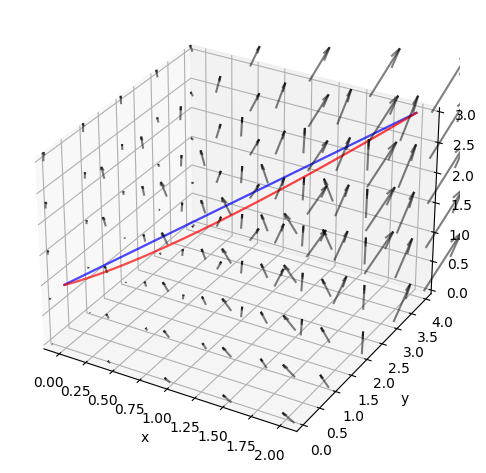

In [55]:
K1 = dtuplot.plot3d_parametric_line(
    *r, (u,0,2), show=False, rendering_kw={"color": "red"}, colorbar=False
)
K2 = dtuplot.plot3d_parametric_line(
    *p, (t,0,1), show=False, rendering_kw={"color": "blue"}, colorbar=False
)
vektorfelt_V = dtuplot.plot_vector(
    V,
    (x, -.1, 2.1),
    (y, -.1, 4.1),
    (z, 0, 3),
    n=5,
    quiver_kw={"alpha": 0.5, "length": 0.05, "color": "black"},
    colorbar=False,
    show=False,
)

combined = K1 + K2 + vektorfelt_V
combined.legend = False
combined.show()

## Exercise 5

Consider the function $f: \mathbb{R}^2 \to \mathbb{R}$ given by

\begin{equation*}
f(x_1,x_2) = x_1^2 +x_2^2 + x_1 +1
\end{equation*}

and the subset $A \subset \mathbb{R}^2$ given by:

\begin{equation*}
A = \{(x_1 ,x_2 )\in \mathbb{R}^2 \mid -2\leq x_1 \leq 2 \, \wedge \, -1\leq x_2 \leq 1 \}.
\end{equation*}

### a

We compute the integral $\int_{A} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)$ by:

In [56]:
x1, x2 = symbols("x_1 x_2", real=True)
f = x1**2 + x2**2 + x1 + 1
integrate(f, (x1,-2,2), (x2,-1,1))

### b

Determining the volume of the set
\begin{equation*} 
    \{(x_1,x_2,x_3)\in \mathbb{R}^3 \mid (x_1,x_2) \in A \wedge 0\leq x_3 \leq f(x_1 ,x_2) \}.
\end{equation*}

We first plot the graph of $f$:

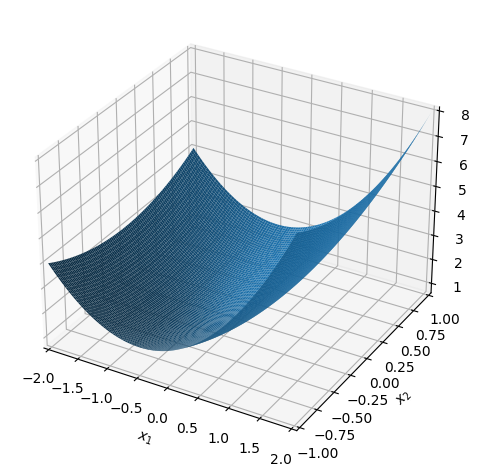

In [57]:
dtuplot.plot3d(f, (x1, -2, 2), (x2, -1, 1))

and note that $f$ is positive on $A$. Since $f$ is positive on $A$, then $f$ resembles an elevation function. The volume is thus equal to the integral found in question a, i.e. $64/3$. 

### c

Let $a > 0$. Let $B \subset \mathbb{R}^2$ denote the circular disk with center at the origin and radius $a$:
\begin{equation*}
B=\{(x_1 ,x_2 )\in \mathbb{R}^2 \mid x_1^2 + x_2^2 \le a^2\}.
\end{equation*}

Parametrizing $B$ using polar coordinates $(r,\theta)$ as:

\begin{equation*} 
s(r,\theta)=(r\cos(\theta),r\sin(\theta))
\end{equation*} 

where $r \in [0,a] , \theta \in [0, 2\pi[$. Hence, we can write $B$ as:

\begin{equation*}
B=\{(r \cos(\theta) ,r \sin(\theta) )\in \mathbb{R}^2 \mid r \in [0,a] \wedge \theta \in [0, 2\pi[ \}.
\end{equation*}

In [58]:
r, theta = symbols("r theta", real=True)
s = Matrix([r * cos(theta), r * sin(theta)])
s

⎡r⋅cos(θ)⎤
⎢        ⎥
⎣r⋅sin(θ)⎦

The partial derivatives of $s$ is given by:

In [59]:
sr = s.diff(r)
stheta = s.diff(theta)
sr, stheta

⎛⎡cos(θ)⎤  ⎡-r⋅sin(θ)⎤⎞
⎜⎢      ⎥, ⎢         ⎥⎟
⎝⎣sin(θ)⎦  ⎣r⋅cos(θ) ⎦⎠

and the Jacobian determinant is therefore:

In [60]:
Jac_det = Matrix.hstack(sr, stheta).det().simplify()
Jac_det

### d

To determine the value of $a$ to 3 decimal places such that
\begin{equation*}
\int_{A} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)=\int_{B} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)
\end{equation*}

we must compute the right-hand side's plane integral $\int_{B} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)$.

Since the Jacobian determinant is non-zero in the interior of $B$, and since the parametrization is regular (injective and never the zero vector on the interior of $B$), we can carry out the integral over the parameter region with the Jacobian function as a correction factor.

The Jacobian function is the absolute value of the Jacobian determinant. The determinant is $r$ and thus always non-negative, so the Jacobian function is just:

In [61]:
Jac = r

The integrand of the plane integral of $f$ over $B$:

In [62]:
a = symbols("a", real=True)
integrand = Jac_det * f.subs({x1: r * cos(theta), x2: r * sin(theta)}).simplify()
integrand

The plane integral $\int_{B} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)$:

In [63]:
int_value = integrate(integrand, (theta, 0, 2* pi), (r,0,a))
int_value

Hence, $\int_{A} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)=\int_{B} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)$ happens exactly when $64/3=\frac{\pi a^4}2+\pi a^2$. 
Thus, we can find the value of $a>0$ that results in $\int_{A} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)=\int_{B} f(x_1,x_2) \,\mathrm{d} (x_1,x_2)$ by:

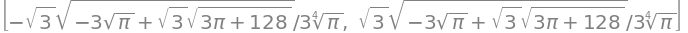

In [64]:
sols = solve(Eq(int_value, S(64) / 3))
sols

In [65]:
sols[0].evalf(),sols[1].evalf()

Hence, since $a>0$, we conclude that $a = 1.679$.